In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform

# Load data

In [2]:
df = pd.read_csv("../data/heart_disease.csv")
X = df.drop("num", axis=1)
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# GridSearchCV

In [29]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=30), param_grid_lr, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression:", grid_lr.best_params_)
print("Cross-Validated Best Score (Logistic Regression):", grid_lr.best_score_)


Best Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Cross-Validated Best Score (Logistic Regression): 0.59515306122449


In [31]:
# Decision Tree
param_grid_dt = {
    'max_depth': [2, 3, 5, 7, 10, 12, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=30), param_grid_dt, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best Decision Tree:", grid_dt.best_params_)
print("Cross-Validated Best Score (Logistic Regression):", grid_dt.best_score_)


Best Decision Tree: {'max_depth': 2, 'min_samples_split': 2}
Cross-Validated Best Score (Logistic Regression): 0.533078231292517


In [32]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 3, 4, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=30), param_grid_rf, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Random Forest:", grid_rf.best_params_)
print("Cross-Validated Best Score (Random Forest):", grid_rf.best_score_)

Best Random Forest: {'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 100}
Cross-Validated Best Score (Random Forest): 0.6077380952380953


In [33]:
# SVM
param_grid_svm = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=30), param_grid_svm, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best SVM:", grid_svm.best_params_)
print("Cross-Validated Best Score (SVM):", grid_svm.best_score_)

Best SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validated Best Score (SVM): 0.599234693877551


# RandomizedSearchCV

In [7]:
# Logistic Regression
param_dist_lr = {
    'C': uniform(0.001, 10),
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}
rand_lr = RandomizedSearchCV(LogisticRegression(random_state=30), param_dist_lr, n_iter=10, scoring='accuracy', random_state=30)
rand_lr.fit(X_train, y_train)
print("Best Logistic Regression (Randomized):", rand_lr.best_params_)
print("Best Score (Logistic Regression):", rand_lr.best_score_)

Best Logistic Regression (Randomized): {'C': np.float64(1.6375072610275332), 'solver': 'newton-cg'}
Best Score (Logistic Regression): 0.5952380952380952


In [8]:
# Decision Tree
param_dist_dt = {
    'max_depth': [2, 3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}
rand_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=30), param_dist_dt, n_iter=10, scoring='accuracy', random_state=30)
rand_dt.fit(X_train, y_train)
print("Best Decision Tree (Randomized):", rand_dt.best_params_)
print("Best Score (Decision Tree):", rand_dt.best_score_)

Best Decision Tree (Randomized): {'min_samples_split': 20, 'max_depth': 10}
Best Score (Decision Tree): 0.5333333333333333


In [9]:
# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 15]
}
rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=30), param_dist_rf, n_iter=20, scoring='accuracy', random_state=30)
rand_rf.fit(X_train, y_train)
print("Best Random Forest (Randomized):", rand_rf.best_params_)
print("Best Score (Random Forest):", rand_rf.best_score_)

Best Random Forest (Randomized): {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}
Best Score (Random Forest): 0.5995748299319728


In [10]:
# SVM
param_dist_svm = {
    'C': uniform(0.01, 50),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
rand_svm = RandomizedSearchCV(SVC(probability=True, random_state=30), param_dist_svm, n_iter=20, scoring='accuracy', random_state=30)
rand_svm.fit(X_train, y_train)
print("Best SVM (Randomized):", rand_svm.best_params_)
print("Best Score (SVM):", rand_svm.best_score_)

Best SVM (Randomized): {'C': np.float64(1.341218238655718), 'gamma': 'auto', 'kernel': 'rbf'}
Best Score (SVM): 0.599234693877551


# Load baseline models

In [11]:
with open("../models/logistic_regression_model.pkl", "rb") as file:
    log_reg_model = pkl.load(file)

with open("../models/decision_tree_model.pkl", "rb") as file:
    dt_model = pkl.load(file)

with open("../models/random_forest_model.pkl", "rb") as file:
    rf_model = pkl.load(file)

with open("../models/svm_model.pkl", "rb") as file:
    svm_model = pkl.load(file)

# Compare models

## Organize models in a dictionary

In [34]:
# models[model_name][i]
# i = 0: baseline, 1: grid search, 2: randomized search

models = {
    "Logistic Regression": [log_reg_model, grid_lr.best_estimator_, rand_lr.best_estimator_],
    "Decision Tree": [dt_model, grid_dt.best_estimator_, rand_dt.best_estimator_],
    "Random Forest": [rf_model, grid_rf.best_estimator_, rand_rf.best_estimator_],
    "SVM": [svm_model, grid_svm.best_estimator_, rand_svm.best_estimator_]
}


## Test and score each model

In [ ]:
metrics = pd.DataFrame(columns = ["accuracy", "roc_auc", "classification_report"])
index_to_variation = {0: "Baseline", 1: "Grid Search", 2: "Randomized Search"}

for model_name, model_variations in models.items():
    for i, model in enumerate(model_variations):
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr') 
        class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        
        metrics.loc[f"{model_name} - {index_to_variation[i]}"] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "classification_report": class_report
        }


with open("../results/hyperparameter_tuning_metrics.pkl", "wb") as f:
    pkl.dump(metrics, f)
    
metrics

c:\Users\mhame\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\mhame\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,accuracy,roc_auc,classification_report
Logistic Regression - Baseline,0.622951,0.853772,"{'0.0': {'precision': 0.9459459459459459, 'rec..."
Logistic Regression - Grid Search,0.639344,0.851683,"{'0.0': {'precision': 0.9722222222222222, 'rec..."
Logistic Regression - Randomized Search,0.622951,0.852895,"{'0.0': {'precision': 0.9459459459459459, 'rec..."
Decision Tree - Baseline,0.655738,0.805948,"{'0.0': {'precision': 0.9444444444444444, 'rec..."
Decision Tree - Grid Search,0.639344,0.790968,"{'0.0': {'precision': 0.875, 'recall': 0.89743..."
Decision Tree - Randomized Search,0.639344,0.781029,"{'0.0': {'precision': 0.9142857142857143, 'rec..."
Random Forest - Baseline,0.344262,0.399886,"{'0.0': {'precision': 0.5, 'recall': 0.4871794..."
Random Forest - Grid Search,0.672131,0.825316,"{'0.0': {'precision': 0.9230769230769231, 'rec..."
Random Forest - Randomized Search,0.655738,0.825532,"{'0.0': {'precision': 0.9459459459459459, 'rec..."
SVM - Baseline,0.655738,0.834612,"{'0.0': {'precision': 0.9024390243902439, 'rec..."


## Plot results

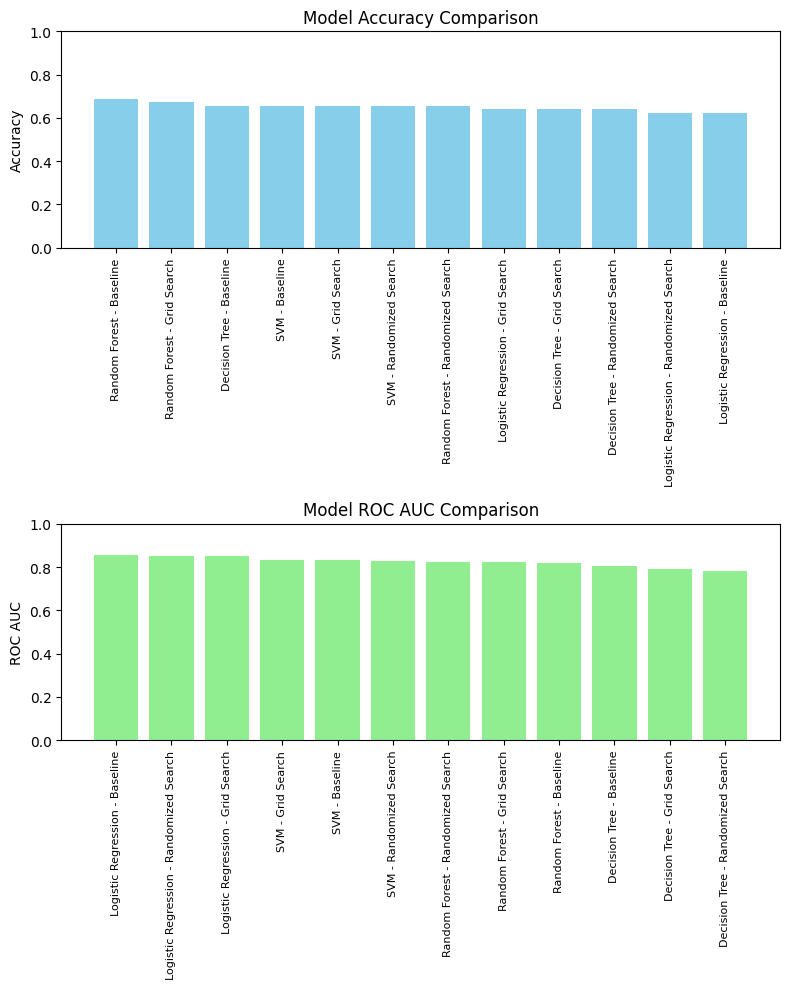

In [36]:
fig , (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

acc_sorted_metrics= metrics.sort_values(by='accuracy', ascending=False)
ax1.bar(acc_sorted_metrics.index, acc_sorted_metrics['accuracy'], color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.tick_params(axis='x', labelsize=8, labelrotation=90)
ax1.set_ylim(0, 1)

auc_sorted_metrics= metrics.sort_values(by='roc_auc', ascending=False)
ax2.bar(auc_sorted_metrics.index, auc_sorted_metrics['roc_auc'], color='lightgreen')
ax2.set_ylabel('ROC AUC')
ax2.set_title('Model ROC AUC Comparison')
ax2.tick_params(axis='x', labelsize=8, labelrotation=90)
ax2.set_ylim(0, 1)


plt.tight_layout()
plt.show()

## Save best model

In [42]:
# Use RandomForestClassifier for RFE estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=30), n_features_to_select=6)

pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Scaling
    ('pca', PCA(n_components=6)),           # PCA (adjust n_components as needed)
    ('feature_selection', rfe),  # Feature selection
    ('classifier', rf_model) 
])

pipeline.fit(X_train, y_train)

# Save pipeline
with open("../models/final_model.pkl", "wb") as f:
    pkl.dump(pipeline, f)